In [3]:
# Import common libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import statistical modeling libraries
import statsmodels.api as sm
from statsmodels.stats import diagnostic
from statsmodels.tsa.api import VAR, SARIMAX

In [4]:
# Load the dataset
df = pd.read_csv('../data/cybersecurity_dataset.csv')

In [5]:
# 1. Basic Information
print("\n=== Dataset Info ===")
print(df.info())

print("\n=== First Few Rows ===")
print(df.head())


=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number_of_Breaches  100 non-null    int64  
 1   Cost_of_Breach      100 non-null    float64
 2   Type_of_Breach      100 non-null    object 
 3   Severity_of_Breach  100 non-null    object 
 4   Time_to_Detection   100 non-null    float64
 5   Data_Loss           100 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 4.8+ KB
None

=== First Few Rows ===
   Number_of_Breaches  Cost_of_Breach Type_of_Breach Severity_of_Breach  \
0                   6      284.590963       Phishing                Low   
1                   4       90.294836     Ransomware               High   
2                   8      265.716170           DDoS             Medium   
3                   4      112.666519        Malware                Low   
4                

In [7]:
# 2. Statistical Summary
print("\n=== Summary Statistics ===")
print(df.describe())

print("\n=== Breach Types Distribution ===")
print(df['Type_of_Breach'].value_counts())

print("\n=== Severity Distribution ===")
print(df['Severity_of_Breach'].value_counts())



=== Summary Statistics ===
       Number_of_Breaches  Cost_of_Breach  Time_to_Detection   Data_Loss
count          100.000000      100.000000         100.000000  100.000000
mean             5.760000      464.454618          46.956540  432.311490
std              2.659536      269.385422          28.301937  253.175466
min              1.000000       31.154618           1.276335    7.544720
25%              4.000000      270.911183          20.317365  240.429899
50%              6.000000      402.990389          47.600938  395.511497
75%              8.000000      692.267944          69.358179  620.799425
max             10.000000      990.558136          99.825210  959.585643

=== Breach Types Distribution ===
Type_of_Breach
SQLInjection    24
Malware         22
DDoS            21
Phishing        18
Ransomware      15
Name: count, dtype: int64

=== Severity Distribution ===
Severity_of_Breach
High        32
Critical    29
Medium      25
Low         14
Name: count, dtype: int64


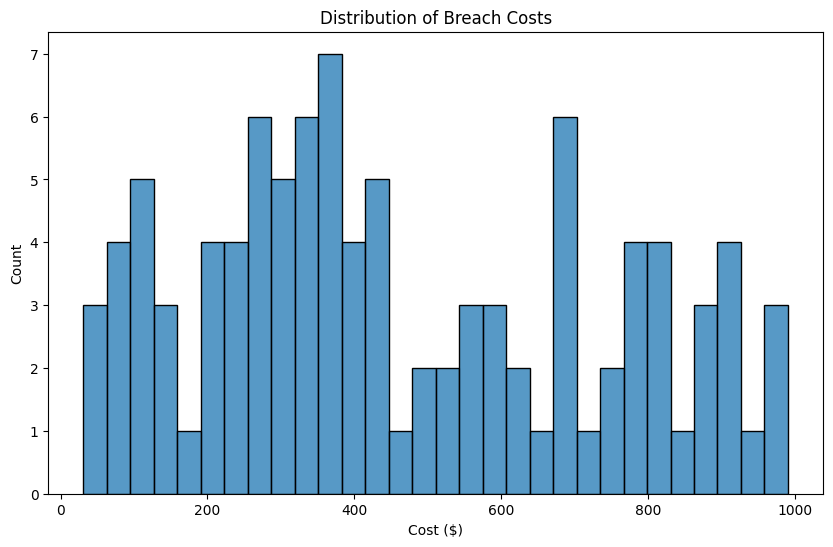

In [8]:
# 3. Visualizations
# Cost distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Cost_of_Breach', bins=30)
plt.title('Distribution of Breach Costs')
plt.xlabel('Cost ($)')
plt.show()

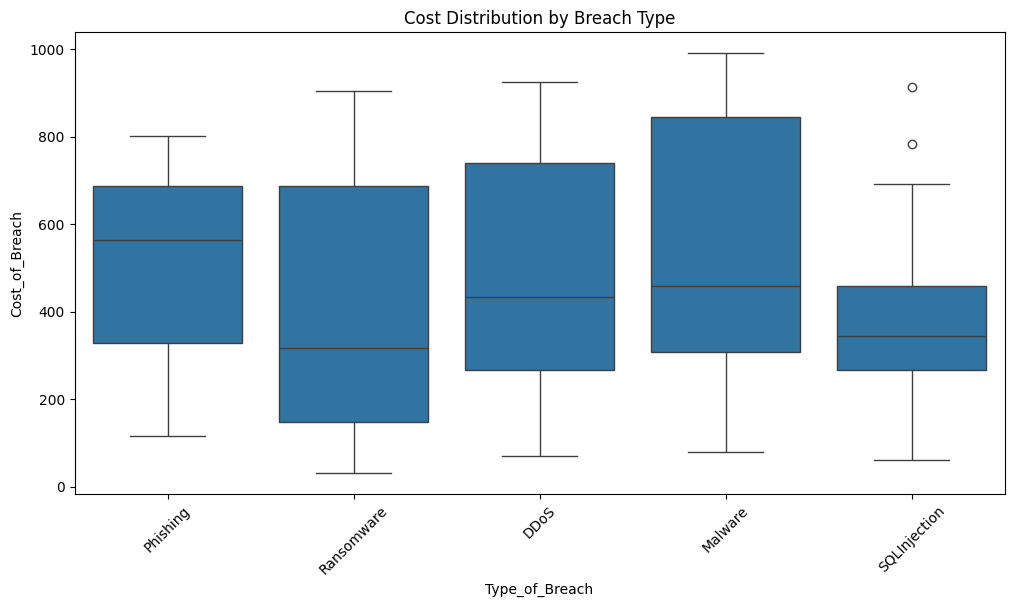

In [9]:
# Costs by breach type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Type_of_Breach', y='Cost_of_Breach')
plt.title('Cost Distribution by Breach Type')
plt.xticks(rotation=45)
plt.show()

([0, 1, 2, 3],
 [Text(0, 0, 'Low'),
  Text(1, 0, 'Medium'),
  Text(2, 0, 'High'),
  Text(3, 0, 'Critical')])

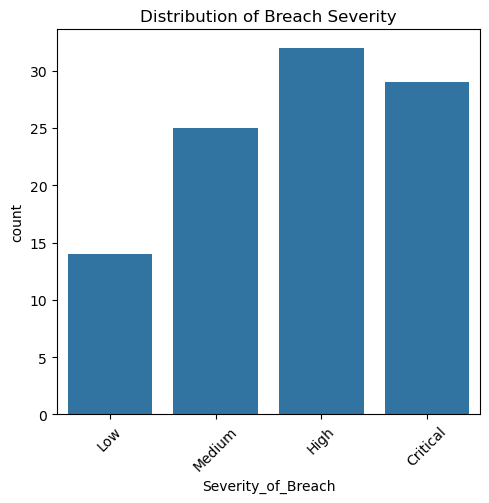

In [50]:
# Severity analysis
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Severity_of_Breach', order=['Low', 'Medium', 'High', 'Critical'])
plt.title('Distribution of Breach Severity')
plt.xticks(rotation=45)

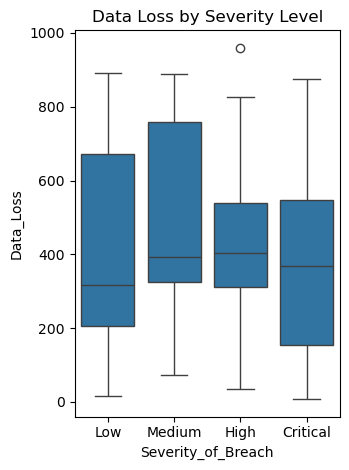

In [62]:
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Severity_of_Breach', y='Data_Loss', order=['Low', 'Medium', 'High', 'Critical'])
plt.title('Data Loss by Severity Level')
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


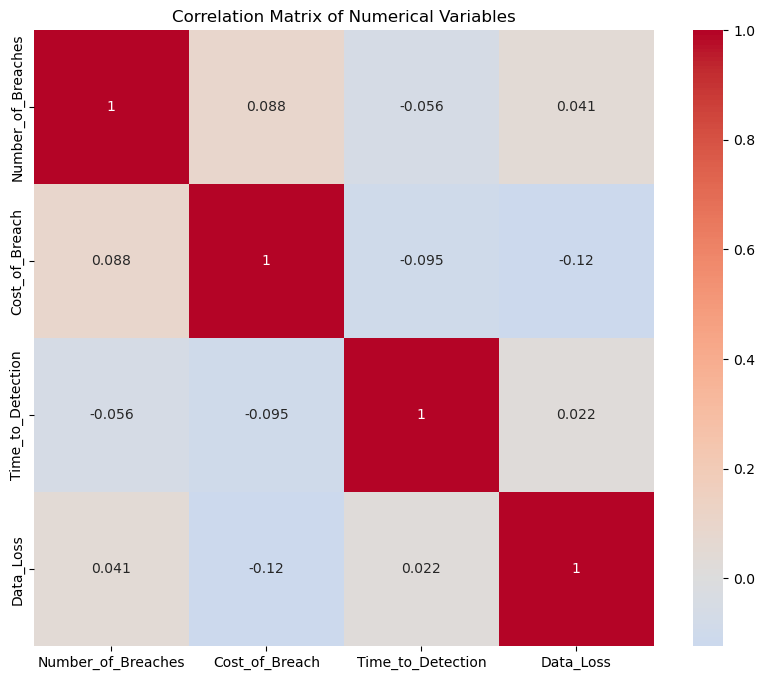

In [54]:
# 4. Correlation Analysis
numerical_cols = ['Number_of_Breaches', 'Cost_of_Breach', 'Time_to_Detection', 'Data_Loss']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()



=== Regression Analysis: Impact of Detection Time on Cost ===
                            OLS Regression Results                            
Dep. Variable:         Cost_of_Breach   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8839
Date:                Sat, 15 Mar 2025   Prob (F-statistic):              0.349
Time:                        11:25:44   Log-Likelihood:                -700.56
No. Observations:                 100   AIC:                             1405.
Df Residuals:                      98   BIC:                             1410.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

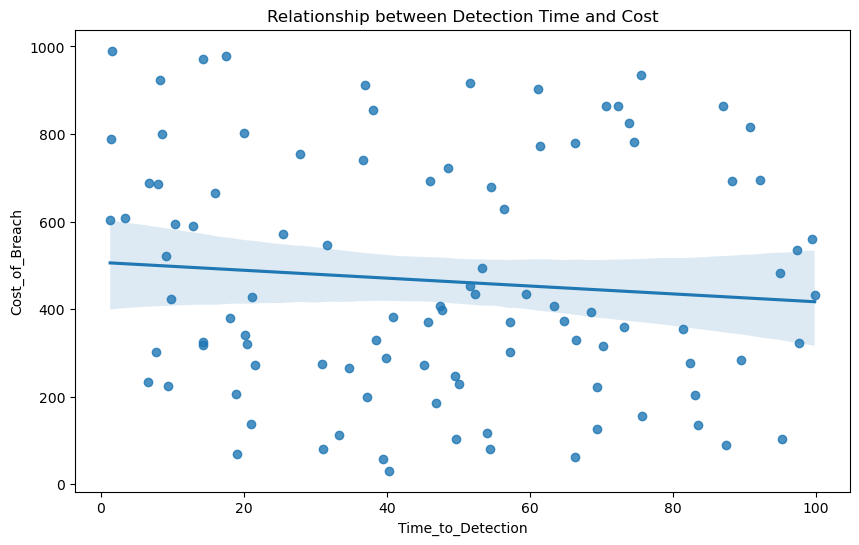

In [56]:
# 5. Statistical Analysis
X = sm.add_constant(df['Time_to_Detection'])
y = df['Cost_of_Breach']
model = sm.OLS(y, X).fit()

print("\n=== Regression Analysis: Impact of Detection Time on Cost ===")
print(model.summary())

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Time_to_Detection', y='Cost_of_Breach')
plt.title('Relationship between Detection Time and Cost')
plt.show()


In [58]:
# 6. Risk Analysis
risk_by_type = df.groupby('Type_of_Breach').agg({
    'Cost_of_Breach': ['mean', 'std', 'count'],
    'Data_Loss': 'mean',
    'Time_to_Detection': 'mean'
}).round(2)

print("\n=== Risk Analysis by Breach Type ===")
print(risk_by_type) 


=== Risk Analysis by Breach Type ===
               Cost_of_Breach               Data_Loss Time_to_Detection
                         mean     std count      mean              mean
Type_of_Breach                                                         
DDoS                   499.47  269.46    21    423.81             49.26
Malware                534.20  321.43    22    443.27             40.91
Phishing               498.49  226.18    18    357.54             41.39
Ransomware             401.75  310.62    15    483.83             49.63
SQLInjection           383.55  205.60    24    453.58             52.99
